## Different `threshold_position` options

#### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tobac
import xarray as xr

#### Generate Feature Data

Here, we will generate some simple feature data where the features that we want to detect are *higher* values than the surrounding (0).

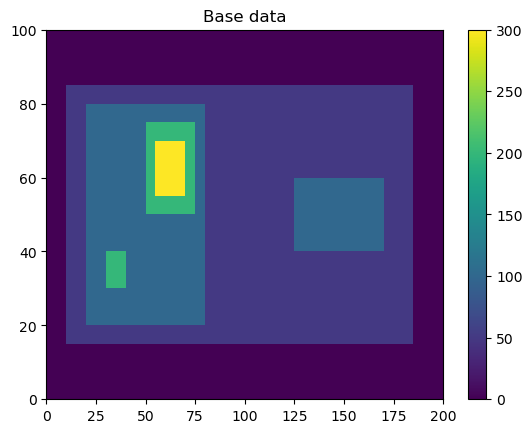

In [2]:
# Dimensions here are time, y, x.
input_field_arr = np.zeros((1, 100, 200))
input_field_arr[0, 15:85, 10:185] = 50
input_field_arr[0, 20:80, 20:80] = 100
input_field_arr[0, 40:60, 125:170] = 100
input_field_arr[0, 30:40, 30:40] = 200
input_field_arr[0, 50:75, 50:75] = 200
input_field_arr[0, 55:70, 55:70] = 300

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

In [3]:
# We now need to generate an Iris DataCube out of this dataset to run tobac feature detection.
# One can use xarray to generate a DataArray and then convert it to Iris, as done here.
input_field_iris = xr.DataArray(
    input_field_arr,
    dims=["time", "Y", "X"],
    coords={"time": [np.datetime64("2019-01-01T00:00:00")]},
).to_iris()
# Version 2.0 of tobac (currently in development) will allow the use of xarray directly with tobac.

/var/folders/cw/ddjy53ds5h51szdq1630n50r0000gp/T/ipykernel_88344/1759418141.py:3: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  input_field_iris = xr.DataArray(


***

#### `position_threshold='center'`
This option will choose the arithmetic center of the area above the threshold. This is typically not recommended for most data. 

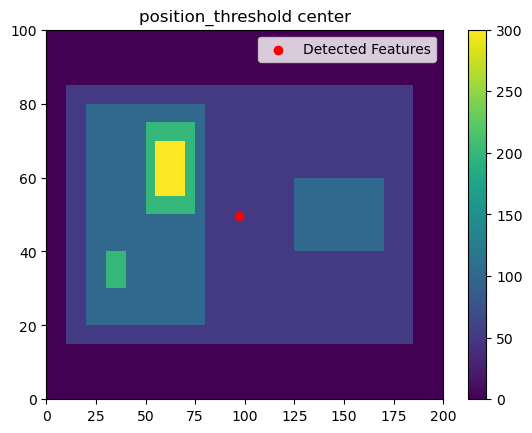

In [4]:
thresholds = [
    50,
]
position_threshold = "center"
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold=position_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("position_threshold " + position_threshold)
plt.show()

***

#### `position_threshold='extreme'`
This option will choose the most extreme point of our data. For `target='maximum'`, this will be the largest value in the feature area.

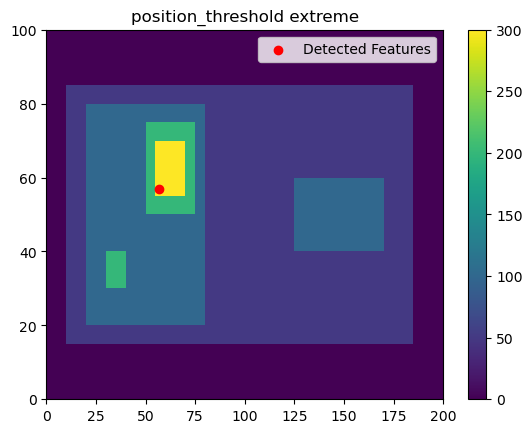

In [5]:
thresholds = [
    50,
]
position_threshold = "extreme"
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold=position_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("position_threshold " + position_threshold)
plt.show()

***

#### `position_threshold='weighted_diff'`
This option will choose the center of the region weighted by the distance from the threshold value.

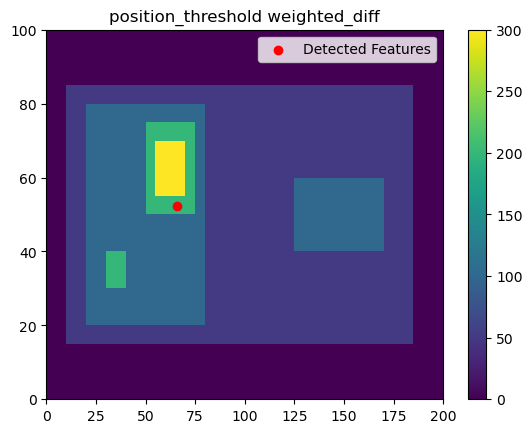

In [6]:
thresholds = [
    50,
]
position_threshold = "weighted_diff"
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold=position_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("position_threshold " + position_threshold)
plt.show()

***

#### `position_threshold='weighted_abs'`
This option will choose the center of the region weighted by the absolute values of the field.

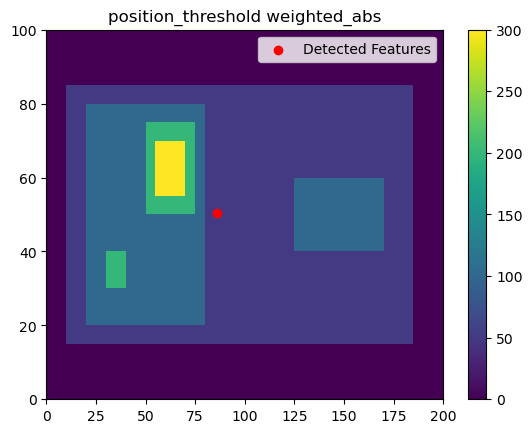

In [7]:
thresholds = [
    50,
]
position_threshold = "weighted_abs"
single_threshold_features = tobac.feature_detection_multithreshold(
    field_in=input_field_iris,
    dxy=1000,
    threshold=thresholds,
    target="maximum",
    position_threshold=position_threshold,
)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(
    x=single_threshold_features["hdim_2"].values,
    y=single_threshold_features["hdim_1"].values,
    color="r",
    label="Detected Features",
)
plt.legend()
plt.title("position_threshold " + position_threshold)
plt.show()

***

#### All four methods together

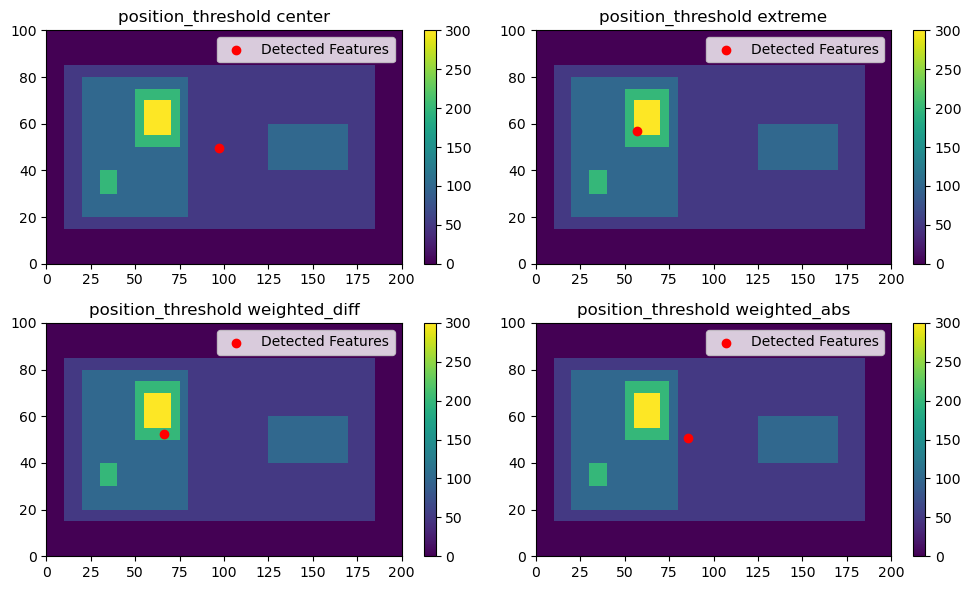

In [8]:
thresholds = [
    50,
]
fig, axarr = plt.subplots(2, 2, figsize=(10, 6))
testing_thresholds = ["center", "extreme", "weighted_diff", "weighted_abs"]
for position_threshold, ax in zip(testing_thresholds, axarr.flatten()):
    single_threshold_features = tobac.feature_detection_multithreshold(
        field_in=input_field_iris,
        dxy=1000,
        threshold=thresholds,
        target="maximum",
        position_threshold=position_threshold,
    )
    color_mesh = ax.pcolormesh(input_field_arr[0])
    plt.colorbar(color_mesh, ax=ax)
    # Plot all features detected
    ax.scatter(
        x=single_threshold_features["hdim_2"].values,
        y=single_threshold_features["hdim_1"].values,
        color="r",
        label="Detected Features",
    )
    ax.legend()
    ax.set_title("position_threshold " + position_threshold)
plt.tight_layout()
plt.show()